In [21]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC
from matplotlib import pyplot as plt
seed = 10

In [2]:
#helper function for plotting SVC
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [36]:
def fit_and_plot(data,label,name,kern="linear",C=1,plot_dist=True):
    if plot_dist:
        plt.figure(1)
        plt.scatter(data[:,0],data[:,1],c=label)
        plt.title(name)
    classifier = SVC(C=C,kernel=kern)
    classifier.fit(data,label)
    plt.figure(2)
    plt.scatter(data[:, 0], data[:, 1], c=label)
    plot_svc_decision_function(classifier)
    plt.title(name)
    plt.show()

## Linearly Seperable SVM

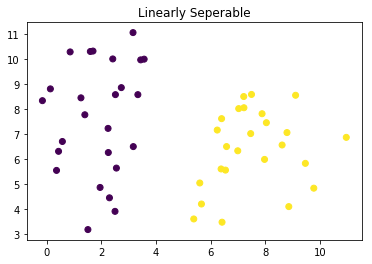

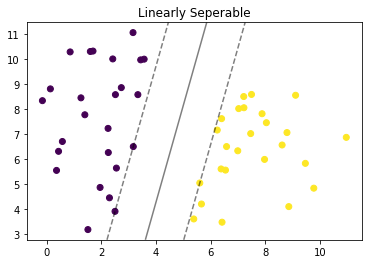

In [20]:
#to generate linearly seperable data
data, label = make_blobs(n_samples=50, centers=2,random_state=seed, cluster_std=1.5)
fit_and_plot(data,label,"Linearly Seperable")

## Linearly non-seperable example, using slacks

In [22]:
from sklearn.datasets.samples_generator import make_classification

In [24]:
data, label = make_classification(n_samples = 100, n_features=2, n_redundant=0, n_classes=2, random_state=seed)

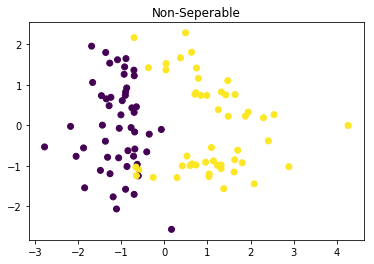

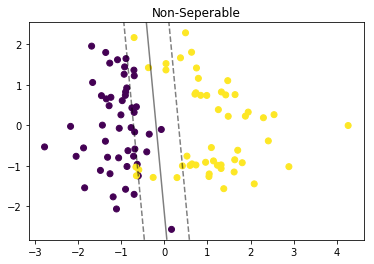

In [26]:
fit_and_plot(data,label,"Non-Seperable")

## Nonlinear Kernel

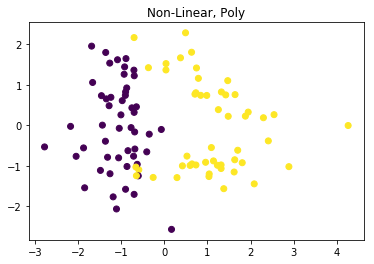

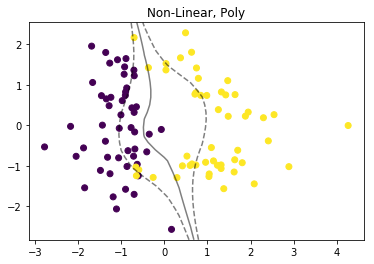

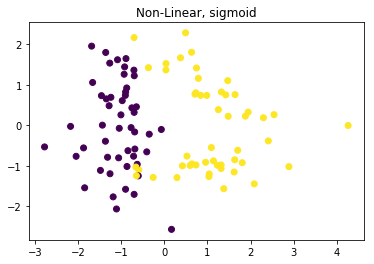

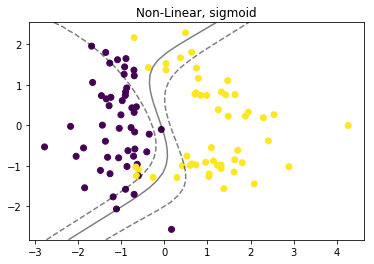

In [28]:
fit_and_plot(data,label,"Non-Linear, Poly","poly")
fit_and_plot(data,label,"Non-Linear, sigmoid","sigmoid")

#### Increasing the penalty

We punish slacks in the objective function

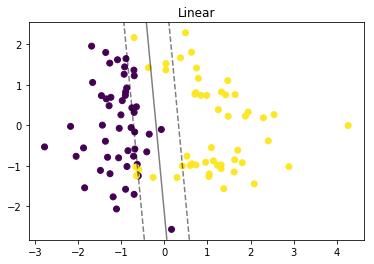

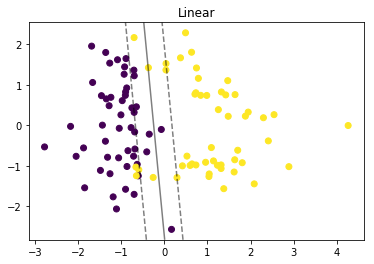

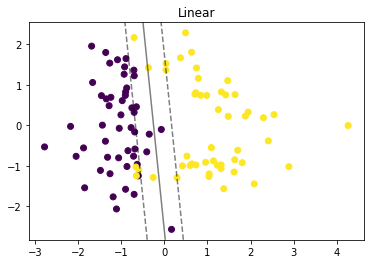

In [44]:
fit_and_plot(data,label,"Linear",C=1,plot_dist=False)
fit_and_plot(data,label,"Linear",C=100,plot_dist=False)
fit_and_plot(data,label,"Linear",C=1000,plot_dist=False)

It seems that it does not affect it much in the linear case.
Let's see the behaviour in Non-Linear kernel case.

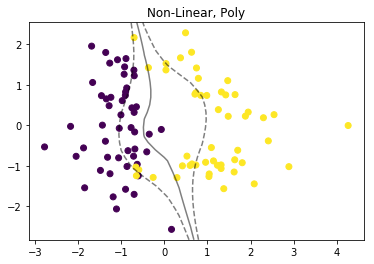

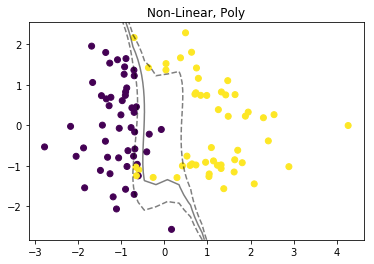

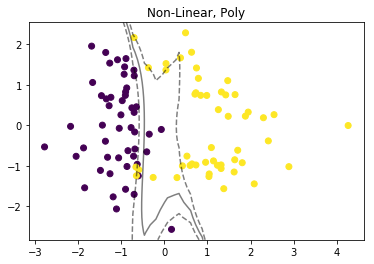

In [45]:
fit_and_plot(data,label,"Non-Linear, Poly","poly",C=1,plot_dist=False)
fit_and_plot(data,label,"Non-Linear, Poly","poly",C=100,plot_dist=False)
fit_and_plot(data,label,"Non-Linear, Poly","poly",C=1000,plot_dist=False)

Now the sigmoid case:

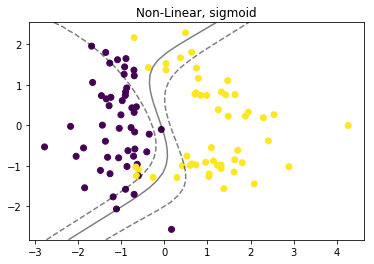

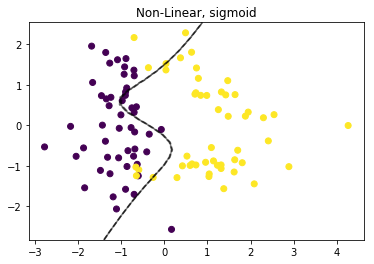

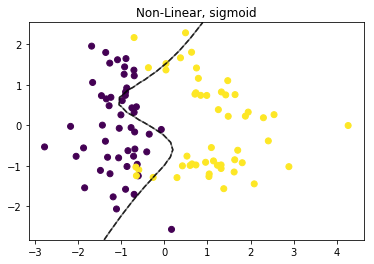

In [46]:
fit_and_plot(data,label,"Non-Linear, sigmoid","sigmoid",C=1,plot_dist=False)
fit_and_plot(data,label,"Non-Linear, sigmoid","sigmoid",C=100,plot_dist=False)
fit_and_plot(data,label,"Non-Linear, sigmoid","sigmoid",C=1000,plot_dist=False)